## Read from dataset

In [69]:
import pandas as pd
df = pd.read_csv('googleplaystore.csv')

Drop duplicates from dataset

In [21]:
print('Number of apps with duplicates = ',len(df))
df = df.drop_duplicates()

Number of apps with duplicates =  10841


In [22]:
print('Total number of apps in the dataset = ',len(df))

Total number of apps in the dataset =  10358


In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
#random 5 apps
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3052,Tennis Livescore Widget,SPORTS,4.1,361,2.2M,"50,000+",Free,0,Everyone,Sports,"October 13, 2016",1.0,2.3 and up
754,C++ Programming,EDUCATION,4.3,11904,1.8M,"1,000,000+",Free,0,Everyone,Education,"August 22, 2015",2.0,2.3 and up
9304,Carrier Landings Pro,FAMILY,4.6,5969,31M,"10,000+",Paid,$12.99,Everyone,Simulation,"June 29, 2018",4.2.4,4.1 and up
5497,AQ Service,BUSINESS,NaN,4,17M,10+,Free,0,Everyone,Business,"August 28, 2017",1.0,4.4 and up
4150,Google,TOOLS,4.4,8021623,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


## Data Cleaning

In [70]:
#remove special characters
remove = ['+',',','$']
clean = ['Installs','Price']

#loop to clean
for col in clean:
    for char in remove:
        df[col] = df[col].apply(lambda x: x.replace(char,''))

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


#### Removing null

In [71]:
#droping null values
df = df.dropna()
df.isna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,False,False,False,False,False,False,False,False,False,False,False,False,False
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
import numpy as np

df['Installs'] = df['Installs'].astype('float')
df['Price'] = df['Price'].astype('float')
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Rating','Installs','Price']] = scaler.fit_transform(df[['Rating','Installs','Price']])
# X_scaled = pd.DataFrame(X_scaled)
# X_scaled.columns = df.columns

## Exploration

#### App Categories

Number of categories =  33


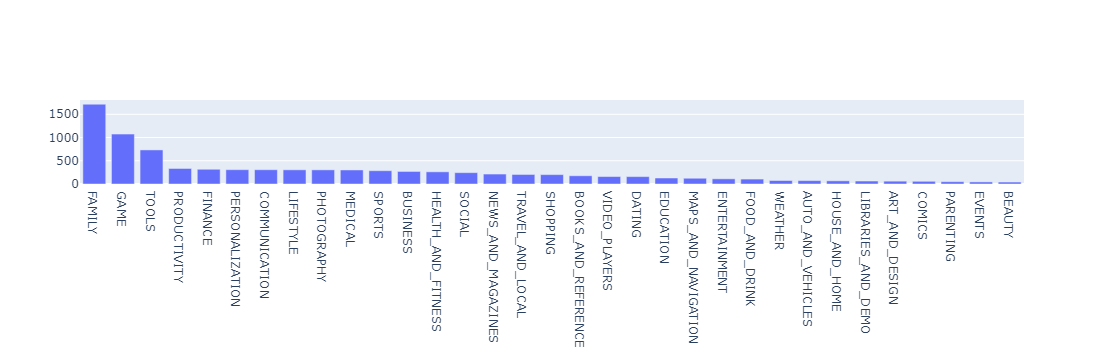

In [49]:
import plotly
plotly.offline.init_notebook_mode(connected = True)
import plotly.graph_objs as go

uni_categories = len(df['Category'].unique())
print('Number of categories = ', uni_categories)

app_in_category = df['Category'].value_counts()
#sort
app_in_category = app_in_category.sort_values(ascending = False)

data = [go.Bar(
    x = app_in_category.index,  #index = category name
    y = app_in_category.values  #value = count
)]
plotly.offline.iplot(data)

#### App Rating

Average app rating =  -3.9981022718889272e-16


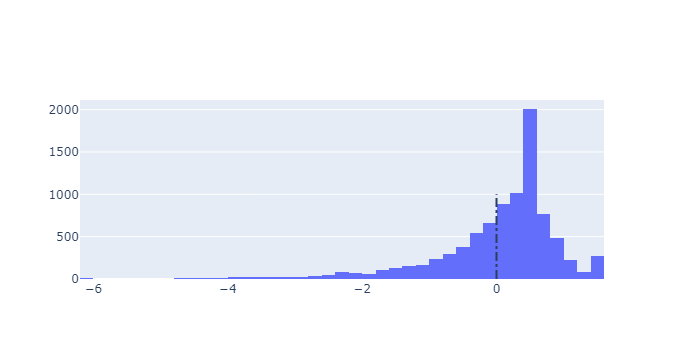

In [50]:
avg_rating = df['Rating'].mean()
print('Average app rating = ',avg_rating)

data = [go.Histogram(
    x = df['Rating']
)]

layout = {'shapes': [{
    'type' : 'line',
    'x0' : avg_rating,
    'y0' : 0,
    'x1' : avg_rating,
    'y1' : 1000,
    'line' : { 'dash': 'dashdot'}
}]
         }

plotly.offline.iplot({'data': data, 'layout': layout})

#### Size and price

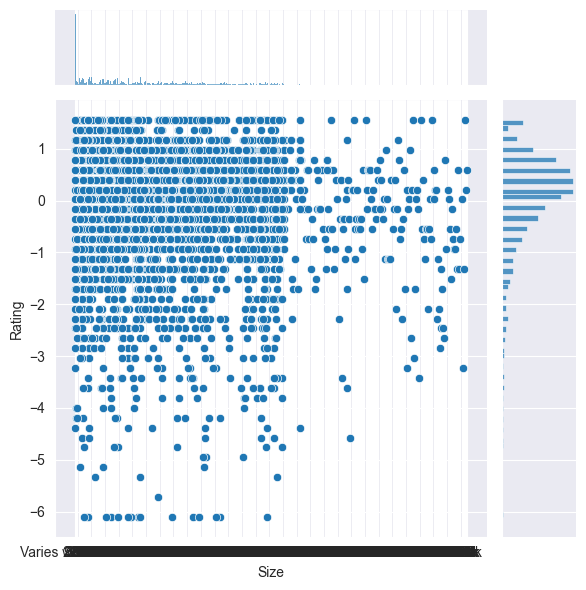

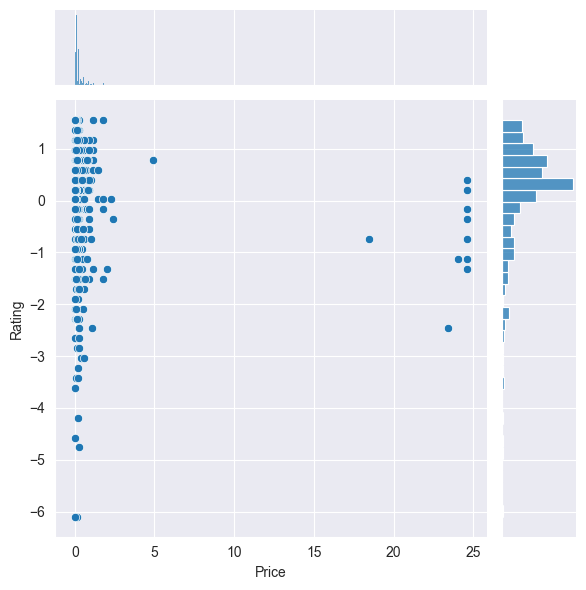

In [51]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

large_apps = df.groupby('Category').filter(lambda x: len(x) >= 250)
plt1 = sns.jointplot(x = large_apps['Size'], y = large_apps['Rating'])

paid_apps = df[df['Type'] == 'Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

#### App category and price

,Category,App,Price


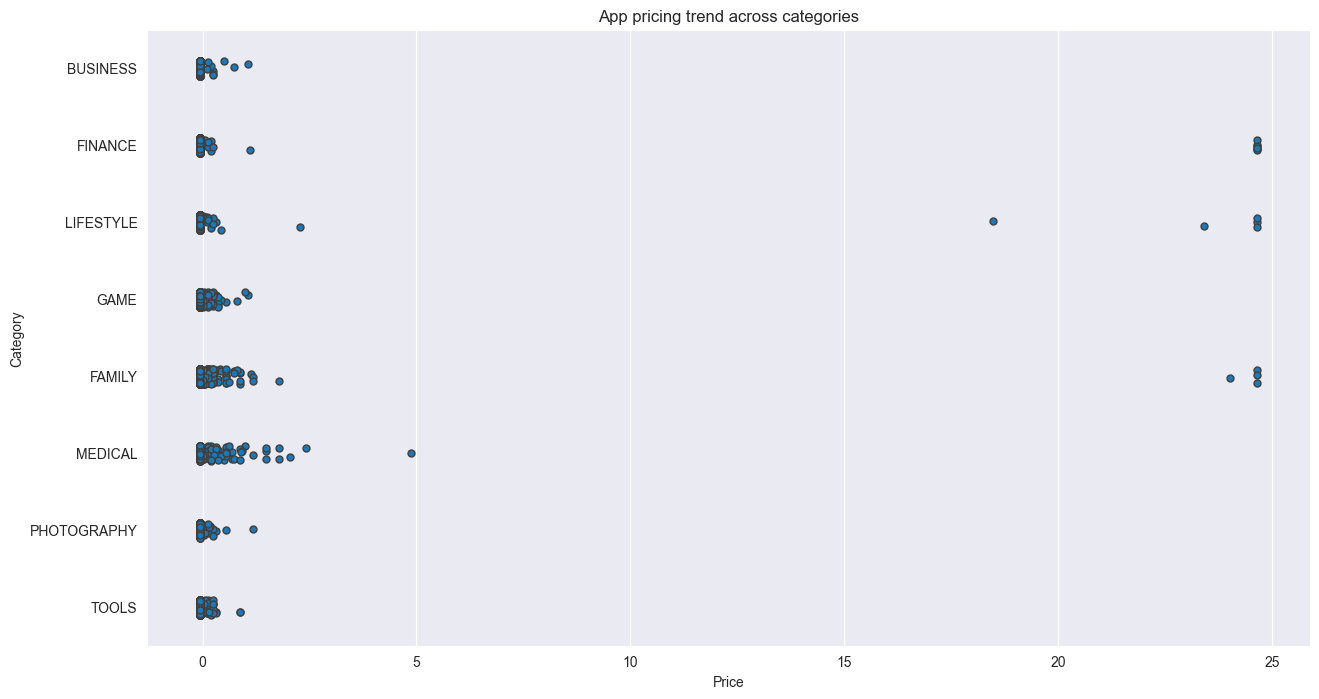

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

popular_categories = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x = popular_categories['Price'], y = popular_categories['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above200 = popular_categories[popular_categories['Price'] > 200]
apps_above200[['Category', 'App', 'Price']]

#### Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

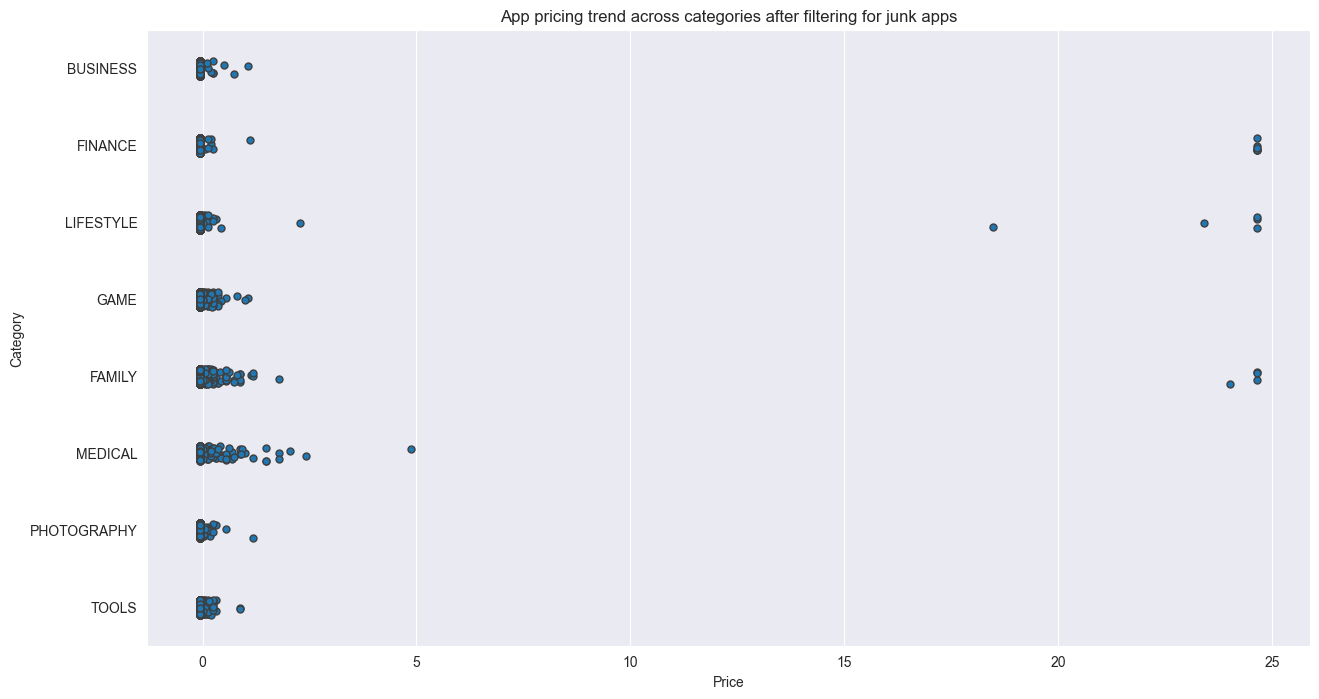

In [65]:
apps_under100 = popular_categories[popular_categories['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

ax = sns.stripplot(x = popular_categories['Price'], y = popular_categories['Category'], data = df, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

#### Free Vs Paid

In [66]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

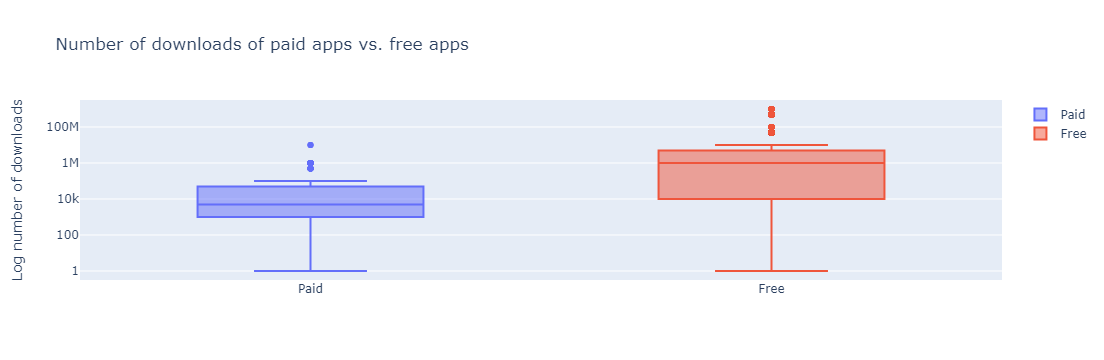

In [73]:
trace0 = go.Box(
    # Data for paid apps
    y = df[df['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = df[df['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## Sentiment analysis of user reviews

In [76]:
review = pd.read_csv('user_reviews.csv')

In [77]:
review.columns

Index(['App', 'Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

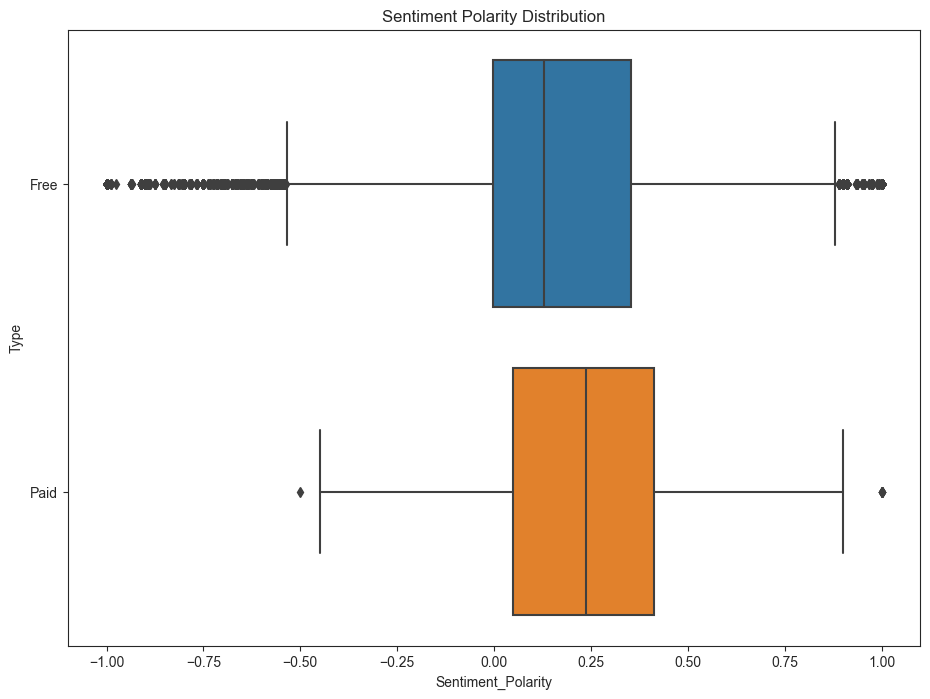

In [80]:
merge_df = pd.merge(df, review,on='App')
merge_df = merge_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Sentiment_Polarity', y = 'Type', data = merge_df)
ax.set_title('Sentiment Polarity Distribution')